# 🌍 Global Debt Analytics Project

## 📌 Objective
This project explores the external debt trends of countries using the World Bank International Debt Statistics (IDS) data from 2000 to 2023. The goal is to identify high-debt countries, analyze regional debt patterns, and provide insights that may support financial risk monitoring and policy decisions.

## 📊 Why This Project Matters
- Rising external debt affects economic stability, especially in developing nations.
- Monitoring debt trends helps governments, investors, and policy makers assess financial risk and sustainability.
- This project demonstrates practical data analysis skills that are relevant for Data Analyst roles.

## 🛠️ Tools & Technologies
- **Data Source:** World Bank IDS (via API / CSV)
- **Languages & Libraries:** Python, Pandas, Seaborn, Matplotlib
- **Visualization Tools:** Tableau / Streamlit (optional)
- **Output:** Interactive charts, dashboards, insights, GitHub documentation

## 📁 Project Workflow
1. Data Acquisition
2. Data Cleaning & Preparation
3. Exploratory Data Analysis (EDA)
4. Outlier Detection
5. Correlation Analysis
6. Visualization & Dashboarding
7. Insights & Recommendations
8. Project Documentation & Sharing


Data Acquisition

In [1]:
import pandas as pd
import requests

# URL to fetch total external debt data
url = "http://api.worldbank.org/v2/country/all/indicator/DT.DOD.DECT.CD?format=json&per_page=20000"
response = requests.get(url).json()

# Convert to DataFrame
debt_data = pd.json_normalize(response[1])
debt_data.to_csv("debt_data.csv", index=False)


In [2]:
# Load the data (if not already)
df = pd.read_csv("debt_data.csv")

Data Cleaning & Preparation

In [3]:
df.head()

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,AFE,2024,NaN,NaN,NaN,0,DT.DOD.DECT.CD,"External debt stocks, total (DOD, current US$)",ZH,Africa Eastern and Southern
1,AFE,2023,NaN,NaN,NaN,0,DT.DOD.DECT.CD,"External debt stocks, total (DOD, current US$)",ZH,Africa Eastern and Southern
2,AFE,2022,NaN,NaN,NaN,0,DT.DOD.DECT.CD,"External debt stocks, total (DOD, current US$)",ZH,Africa Eastern and Southern
3,AFE,2021,NaN,NaN,NaN,0,DT.DOD.DECT.CD,"External debt stocks, total (DOD, current US$)",ZH,Africa Eastern and Southern
4,AFE,2020,NaN,NaN,NaN,0,DT.DOD.DECT.CD,"External debt stocks, total (DOD, current US$)",ZH,Africa Eastern and Southern


In [4]:
df.describe()

,date,value,unit,obs_status,decimal
count,17290.000000,6.296000e+03,0.0,0.0,17290.0
mean,1992.000000,1.133388e+11,NaN,NaN,0.0
std,18.762206,5.755873e+11,NaN,NaN,0.0
min,1960.000000,0.000000e+00,NaN,NaN,0.0
25%,1976.000000,8.661530e+08,NaN,NaN,0.0
50%,1992.000000,4.197983e+09,NaN,NaN,0.0
75%,2008.000000,2.147130e+10,NaN,NaN,0.0
max,2024.000000,8.836012e+12,NaN,NaN,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   countryiso3code  16965 non-null  object 
 1   date             17290 non-null  int64  
 2   value            6296 non-null   float64
 3   unit             0 non-null      float64
 4   obs_status       0 non-null      float64
 5   decimal          17290 non-null  int64  
 6   indicator.id     17290 non-null  object 
 7   indicator.value  17290 non-null  object 
 8   country.id       17225 non-null  object 
 9   country.value    17290 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 1.3+ MB


In [6]:
df.isnull()

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,False,False,True,True,True,False,False,False,False,False
1,False,False,True,True,True,False,False,False,False,False
2,False,False,True,True,True,False,False,False,False,False
3,False,False,True,True,True,False,False,False,False,False
4,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
17285,False,False,True,True,True,False,False,False,False,False
17286,False,False,True,True,True,False,False,False,False,False
17287,False,False,True,True,True,False,False,False,False,False
17288,False,False,True,True,True,False,False,False,False,False


In [11]:
print(df.isnull().sum())

country           0
country_code    162
year              0
debt_value        0
indicator         0
dtype: int64


In [13]:
missing_percent = 100 * df.isnull().sum() / len(df)
print(missing_percent)


country         0.0
country_code    0.0
year            0.0
debt_value      0.0
indicator       0.0
dtype: float64


In [7]:
print(df.columns)

Index(['countryiso3code', 'date', 'value', 'unit', 'obs_status', 'decimal',
       'indicator.id', 'indicator.value', 'country.id', 'country.value'],
      dtype='object')


Changing the column name

In [8]:
df = df[['country.value', 'countryiso3code', 'date', 'value', 'indicator.value']]
df.columns = ['country', 'country_code', 'year', 'debt_value', 'indicator']


In [12]:
# Drop rows where debt_value is missing
df = df.dropna(subset=['country_code'])


In [15]:
#convert datatype
df['year'] = df['year'].astype(int)
df['debt_value'] = df['debt_value'].astype(float)


In [17]:
df = df.dropna(subset=['debt_value'])


In [18]:
df = df[df['year'] >= 2000]

In [20]:
df.to_csv("cleaned_debt_data.csv", index=False)


In [21]:
df.head()

,country,country_code,year,debt_value,indicator
456,East Asia & Pacific (excluding high income),EAP,2023,3.393113e+12,"External debt stocks, total (DOD, current US$)"
457,East Asia & Pacific (excluding high income),EAP,2022,3.415089e+12,"External debt stocks, total (DOD, current US$)"
458,East Asia & Pacific (excluding high income),EAP,2021,3.697309e+12,"External debt stocks, total (DOD, current US$)"
459,East Asia & Pacific (excluding high income),EAP,2020,3.264784e+12,"External debt stocks, total (DOD, current US$)"
460,East Asia & Pacific (excluding high income),EAP,2019,2.992482e+12,"External debt stocks, total (DOD, current US$)"


In [22]:
print(df.shape)
print(df.isnull().sum())
df.describe()

(3034, 5)
country         0
country_code    0
year            0
debt_value      0
indicator       0
dtype: int64


,year,debt_value
count,3034.000000,3.034000e+03
mean,2011.624918,1.563008e+11
std,6.914273,7.215134e+11
min,2000.000000,6.958315e+07
25%,2006.000000,1.911305e+09
50%,2012.000000,7.286615e+09
75%,2018.000000,3.223757e+10
max,2023.000000,8.836012e+12


Exploratory Data Analysis (EDA)

In [23]:
# Shape of the data
print("Rows and columns:", df.shape)

Rows and columns: (3034, 5)


In [24]:
# Column data types
print("\nData types:\n", df.dtypes)


Data types:
 country          object
country_code     object
year              int64
debt_value      float64
indicator        object
dtype: object


In [25]:
# Summary of debt values
df['debt_value'].describe()

,debt_value
count,3.034000e+03
mean,1.563008e+11
std,7.215134e+11
min,6.958315e+07
25%,1.911305e+09
50%,7.286615e+09
75%,3.223757e+10
max,8.836012e+12


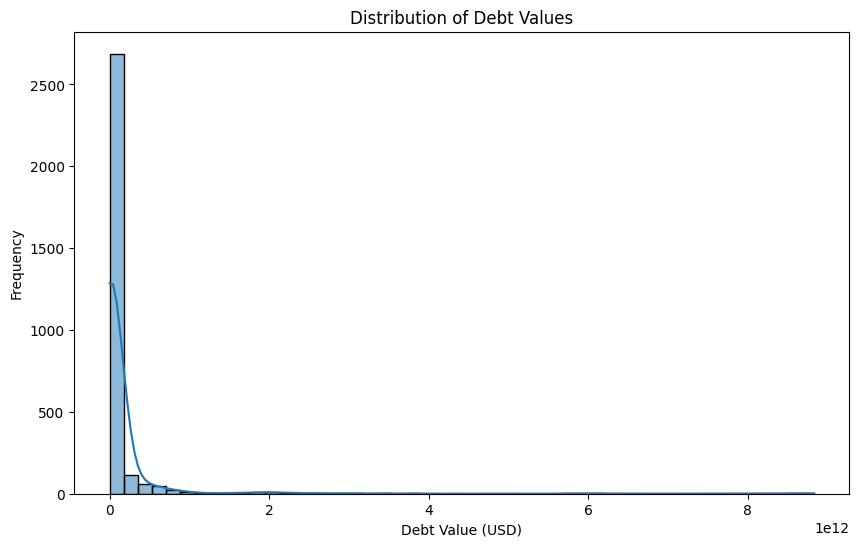

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['debt_value'], bins=50, kde=True)
plt.title("Distribution of Debt Values")
plt.xlabel("Debt Value (USD)")
plt.ylabel("Frequency")
plt.show()


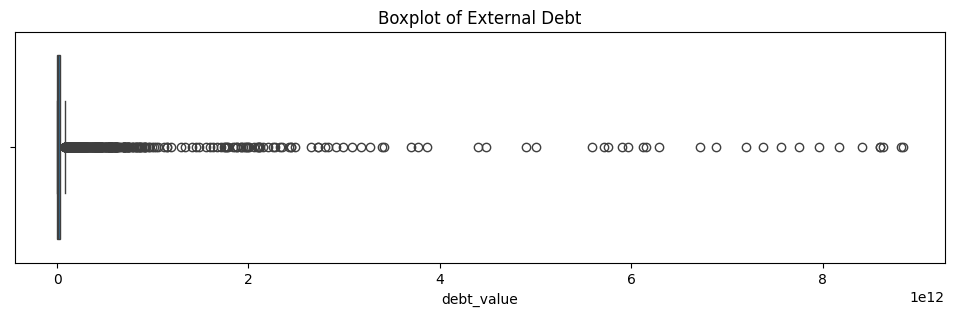

In [27]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=df['debt_value'])
plt.title("Boxplot of External Debt")
plt.show()


In [28]:
# Calculate IQR
q1 = df['debt_value'].quantile(0.25)
q3 = df['debt_value'].quantile(0.75)
iqr = q3 - q1

# Find bounds
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Find outliers
outliers = df[(df['debt_value'] < lower) | (df['debt_value'] > upper)]

print("Total outliers found:", outliers.shape[0])


Total outliers found: 502


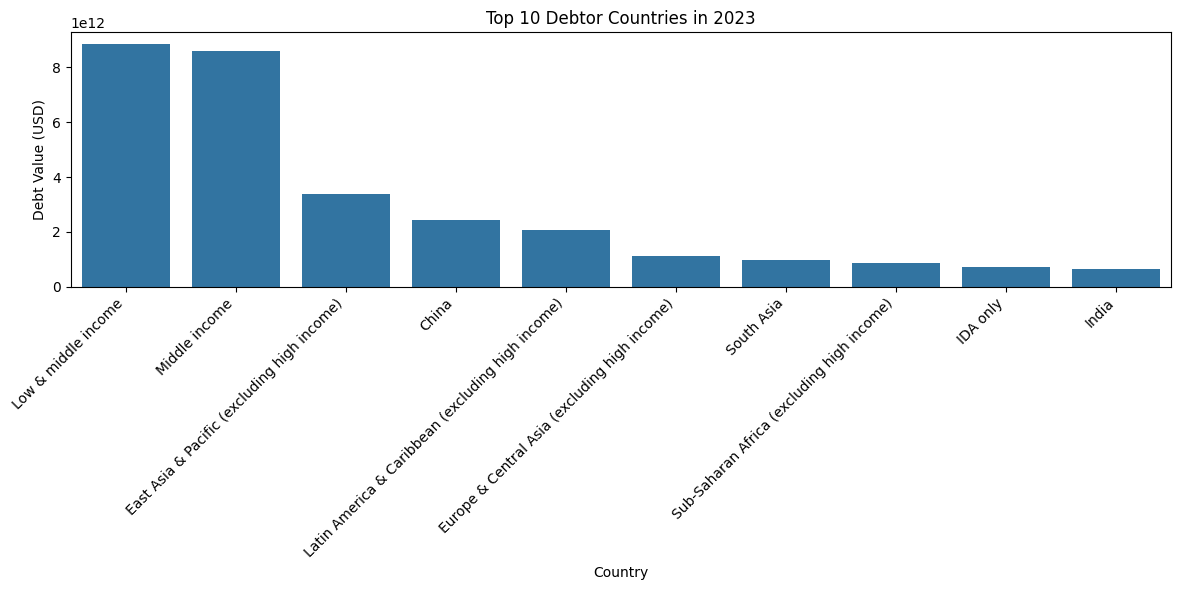

In [33]:
# Find the latest year in the dataset
latest_year = df['year'].max()

# Get top 10 countries with highest debt in that year
top_10 = df[df['year'] == latest_year].nlargest(10, 'debt_value')

plt.figure(figsize=(12, 6))  # Increase width
sns.barplot(x='country', y='debt_value', data=top_10)

plt.title(f"Top 10 Debtor Countries in {latest_year}")
plt.xlabel("Country")
plt.ylabel("Debt Value (USD)")

# Rotate and align x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

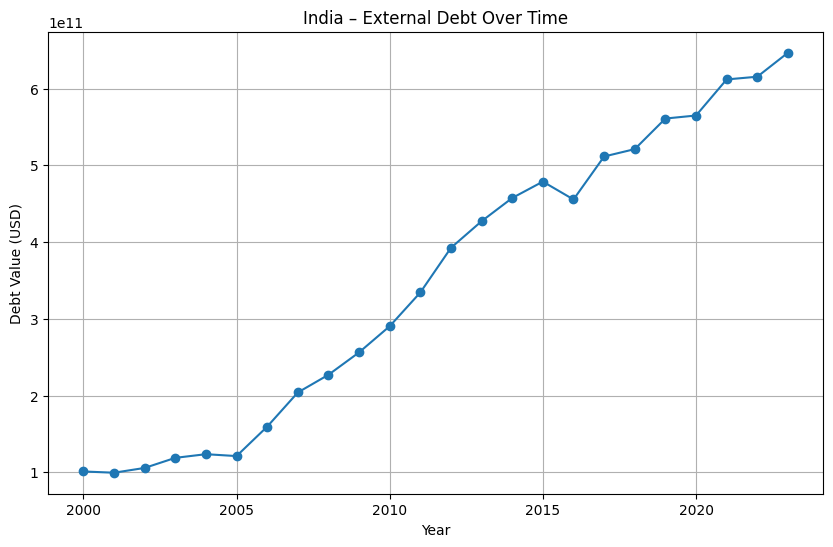

In [30]:
# Change the country name if you want (e.g., 'India')
country_name = "India"

# Filter data for that country
country_df = df[df['country'] == country_name]

# Plot the trend
plt.figure(figsize=(10,6))
plt.plot(country_df['year'], country_df['debt_value'], marker='o')
plt.title(f"{country_name} – External Debt Over Time")
plt.xlabel("Year")
plt.ylabel("Debt Value (USD)")
plt.grid(True)
plt.show()


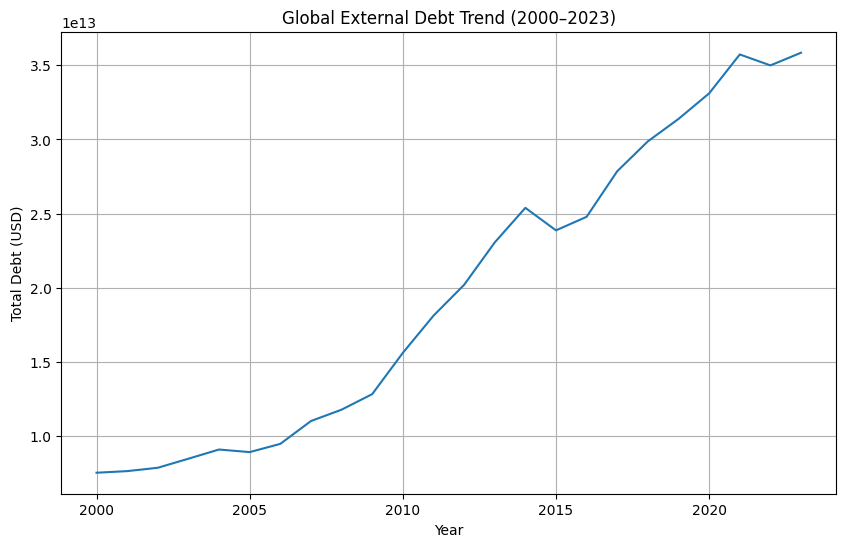

In [31]:
# Group data by year and sum the debt
yearly_trend = df.groupby('year')['debt_value'].sum().reset_index()

# Plot the global trend
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_trend, x='year', y='debt_value')
plt.title("Global External Debt Trend (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Total Debt (USD)")
plt.grid(True)
plt.show()


In [35]:
import requests
import pandas as pd

url = "http://api.worldbank.org/v2/country/all/indicator/NY.GDP.MKTP.CD?format=json&per_page=20000"
response = requests.get(url).json()

gdp_data = pd.json_normalize(response[1])
gdp_data.to_csv("gdp_data.csv", index=False)
gdp_data.head()


,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,AFE,2024,NaN,,,0,NY.GDP.MKTP.CD,GDP (current US$),ZH,Africa Eastern and Southern
1,AFE,2023,1.245472e+12,,,0,NY.GDP.MKTP.CD,GDP (current US$),ZH,Africa Eastern and Southern
2,AFE,2022,1.191423e+12,,,0,NY.GDP.MKTP.CD,GDP (current US$),ZH,Africa Eastern and Southern
3,AFE,2021,1.085745e+12,,,0,NY.GDP.MKTP.CD,GDP (current US$),ZH,Africa Eastern and Southern
4,AFE,2020,9.333918e+11,,,0,NY.GDP.MKTP.CD,GDP (current US$),ZH,Africa Eastern and Southern


Clean data

In [39]:
gdp_data = pd.json_normalize(response[1])
print(gdp_data.columns)


Index(['countryiso3code', 'date', 'value', 'unit', 'obs_status', 'decimal',
       'indicator.id', 'indicator.value', 'country.id', 'country.value'],
      dtype='object')


In [41]:
gdp = gdp_data[['country.value', 'countryiso3code', 'date', 'value']]
gdp.columns = ['country', 'country_code', 'year', 'gdp_value']


In [42]:
gdp = gdp.dropna(subset=['gdp_value'])
gdp['year'] = gdp['year'].astype(int)
gdp['gdp_value'] = gdp['gdp_value'].astype(float)
gdp = gdp[gdp['year'] >= 2000]


<ipython-input-42-d1d534477f05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp['year'] = gdp['year'].astype(int)
<ipython-input-42-d1d534477f05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp['gdp_value'] = gdp['gdp_value'].astype(float)


In [43]:
gdp.head()

,country,country_code,year,gdp_value
1,Africa Eastern and Southern,AFE,2023,1.245472e+12
2,Africa Eastern and Southern,AFE,2022,1.191423e+12
3,Africa Eastern and Southern,AFE,2021,1.085745e+12
4,Africa Eastern and Southern,AFE,2020,9.333918e+11
5,Africa Eastern and Southern,AFE,2019,1.009721e+12


In [45]:
merged_df = pd.merge(df, gdp, on=['country_code', 'year'], how='inner')


In [54]:
print(merged_df.columns.tolist())


['country_x', 'country_code', 'year', 'debt_value', 'indicator', 'country', 'gdp_value', 'debt_to_gdp']


In [55]:
merged_df[['country', 'year', 'debt_value', 'gdp_value', 'debt_to_gdp']].head()


,country,year,debt_value,gdp_value,debt_to_gdp
0,East Asia & Pacific (excluding high income),2023,3.393113e+12,2.116284e+13,0.160334
1,East Asia & Pacific (excluding high income),2022,3.415089e+12,2.112495e+13,0.161661
2,East Asia & Pacific (excluding high income),2021,3.697309e+12,2.084986e+13,0.177330
3,East Asia & Pacific (excluding high income),2020,3.264784e+12,1.749631e+13,0.186598
4,East Asia & Pacific (excluding high income),2019,2.992482e+12,1.722281e+13,0.173751


In [56]:
merged_df['debt_to_gdp'] = merged_df['debt_value'] / merged_df['gdp_value']


In [57]:
merged_df[['country', 'year', 'debt_value', 'gdp_value', 'debt_to_gdp']].head()


,country,year,debt_value,gdp_value,debt_to_gdp
0,East Asia & Pacific (excluding high income),2023,3.393113e+12,2.116284e+13,0.160334
1,East Asia & Pacific (excluding high income),2022,3.415089e+12,2.112495e+13,0.161661
2,East Asia & Pacific (excluding high income),2021,3.697309e+12,2.084986e+13,0.177330
3,East Asia & Pacific (excluding high income),2020,3.264784e+12,1.749631e+13,0.186598
4,East Asia & Pacific (excluding high income),2019,2.992482e+12,1.722281e+13,0.173751


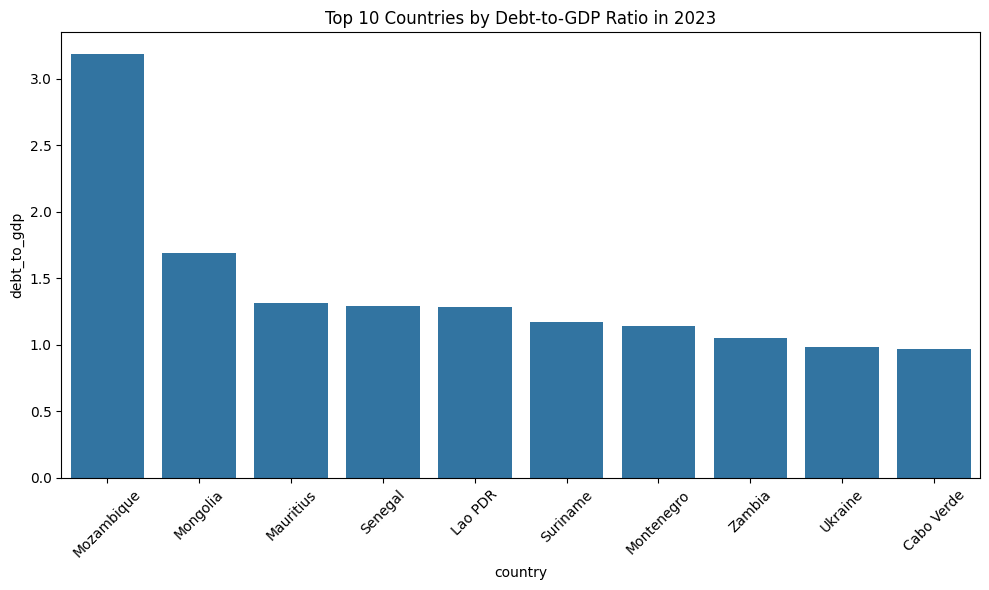

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

latest_year = merged_df['year'].max()
top10 = merged_df[merged_df['year'] == latest_year].nlargest(10, 'debt_to_gdp')

plt.figure(figsize=(10,6))
sns.barplot(x='country', y='debt_to_gdp', data=top10)
plt.title(f"Top 10 Countries by Debt-to-GDP Ratio in {latest_year}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Mozambique has the highest debt-to-GDP ratio, exceeding 3.2, meaning its total external debt is more than three times the size of its entire economy — a strong sign of fiscal distress.

Other countries with significantly high ratios include Mongolia, Mauritius, and Senegal, all exceeding 1.3, indicating that debt levels are greater than or equal to their GDP.

Several developing or low-income economies dominate the list — these countries typically have:

Lower GDP bases

Higher dependency on external loans

Limited capacity to service debt without external aid

This metric signals increased vulnerability to economic shocks, reduced borrowing capacity, and potential default risk.



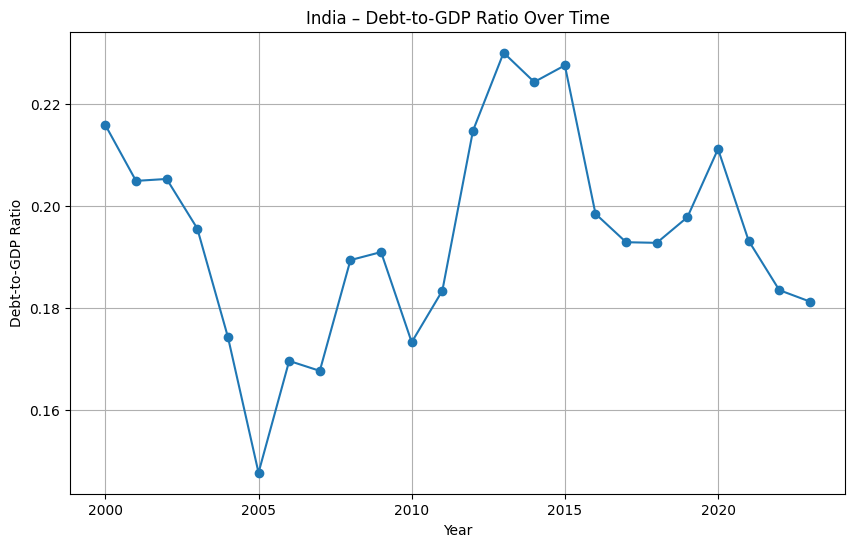

In [59]:
country_name = "India"  # Change as needed
country_df = merged_df[merged_df['country'] == country_name]

plt.figure(figsize=(10,6))
plt.plot(country_df['year'], country_df['debt_to_gdp'], marker='o')
plt.title(f"{country_name} – Debt-to-GDP Ratio Over Time")
plt.xlabel("Year")
plt.ylabel("Debt-to-GDP Ratio")
plt.grid(True)
plt.show()


Early 2000s to 2005:
The ratio steadily declined from ~22% to a low of ~15%, indicating strong GDP growth or reduction in external debt during this period.

2006–2014:
A significant upward trend was observed, peaking around 2013–2015 (~23%).
This could reflect:

Higher external borrowing

Slower GDP growth

Global economic stress (e.g., post-2008 effects)

2015–2023:
The ratio gradually declined and stabilized, with a minor spike in 2020 (~20%), likely due to:

COVID-19 impact

Shrinking GDP

Emergency loans

Recent years (2021–2023):
India’s ratio has steadily decreased to ~18%, indicating economic recovery and stronger growth post-pandemic.

In [62]:
merged_df.to_csv("debt_dashboard_data.csv", index=False)


In [63]:
from google.colab import files
files.download("debt_dashboard_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>